# Imports

In this section, we import the necessary libraries and modules.

In [92]:
import matplotlib.pyplot as plt
import re

For each of the following 4 sections, we perform some analytics on the run times.

# Degree Centrality


- GraphX
real times: [34.0, 36.905, 31.356, 34.756, 33.679, 34.411, 29.978, 31.687, 30.177, 32.25]
user + sys times: [22.704, 26.096, 20.872, 24.276, 20.596, 23.848, 19.96, 19.588, 19.58, 19.708]

- Flink
real times: [26.572, 23.812, 26.68, 29.377, 24.36, 24.289, 26.23, 25.231, 28.662, 23.598]
user + sys times: [8.98, 7.124, 9.124, 9.96, 8.992, 8.204, 9.356, 8.116, 9.144, 6.82]

- For LaTeX table
34.0 & 22.704 & 26.572 & 8.98 \\
\hline
36.905 & 26.096 & 23.812 & 7.124 \\
\hline
31.356 & 20.872 & 26.68 & 9.124 \\
\hline
34.756 & 24.276 & 29.377 & 9.96 \\
\hline
33.679 & 20.596 & 24.36 & 8.992 \\
\hline
34.411 & 23.848 & 24.289 & 8.204 \\
\hline
29.978 & 19.96 & 26.23 & 9.356 \\
\hline
31.687 & 19.588 & 25.231 & 8.116 \\
\hline
30.177 & 19.58 & 28.662 & 9.144 \\
\hline
32.25 & 19.708 & 23.598 & 6.82 \\
\hline

Degree Centrality & 32.920 & 25.881 \\
Degree Centrality & 29.978 & 23.598 \\
Degree Centrality & 36.905 & 29.377 \\
Degree Centrality & 21.723 & 8.582 \\
Degree Centrality & 19.5

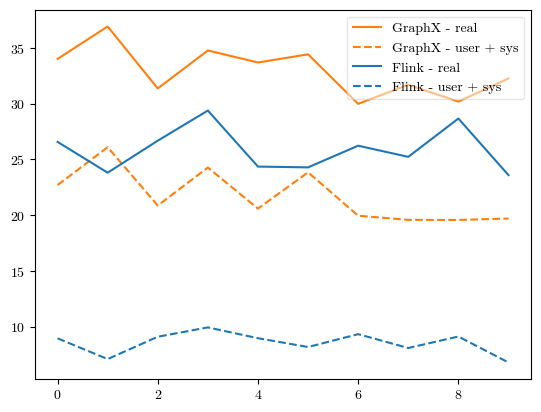

In [93]:
# Read times and seperate them into real, user and sys times in seconds for both GraphX and Flink
real_times = []
user_times = []
sys_times = []

for library in (("graphx", "GraphX", 0, 10), ("flink", "Flink", 10, 20)):
    with open(f"../workspace-{library[0]}/times/degreeCentrality.txt") as f:
        for line in f:
            real_match = re.search(r"real\t(\d+)m(\d+.\d+)s", line)
            if real_match:
                real_time = int(real_match.group(1)) * 60 + float(real_match.group(2))
                real_times.append(real_time)
            
            user_match = re.search(r"user\t(\d+)m(\d+.\d+)s", line)
            if user_match:
                user_time = int(user_match.group(1)) * 60 + float(user_match.group(2))
                user_times.append(user_time)

            sys_match = re.search(r"sys\t(\d+)m(\d+.\d+)s", line)
            if sys_match:
                sys_time = int(sys_match.group(1)) * 60 + float(sys_match.group(2))
                sys_times.append(sys_time)
    
    # Add the user and sys times into one list user_sys_times
    user_sys_times = []
    for i in range(len(user_times)):
        user_sys_times.append(user_times[i] + sys_times[i])

    # Turn the times into floats and round them to 3 decimal places
    real_times = [round(float(i), 3) for i in real_times]
    user_sys_times = [round(float(i), 3) for i in user_sys_times]

    print(f"\n- {library[1]}")
    print("real times:", real_times[library[2]:library[3]])
    print("user + sys times:", user_sys_times[library[2]:library[3]])

print(f"\n- For LaTeX table")
for i in range(10):
    print(f"{real_times[i]} & {user_sys_times[i]} & {real_times[i+10]} & {user_sys_times[i+10]} \\\\")
    print(f"\hline")

avg_real_graphx = sum(real_times[:10]) / len(real_times[:10])
avg_real_flink = sum(real_times[10:]) / len(real_times[10:])
min_real_graphx = min(real_times[:10])
max_real_graphx = max(real_times[:10])
min_real_flink = min(real_times[10:])
max_real_flink = max(real_times[10:])

avg_user_sys_graphx = sum(user_sys_times[:10]) / len(user_sys_times[:10])
avg_user_sys_flink = sum(user_sys_times[10:]) / len(user_sys_times[10:])
min_user_sys_graphx = min(user_sys_times[:10])
max_user_sys_graphx = max(user_sys_times[:10])
min_user_sys_flink = min(user_sys_times[10:])
max_user_sys_flink = max(user_sys_times[10:])

print(f"\nDegree Centrality & {avg_real_graphx:.3f} & {avg_real_flink:.3f} \\\\")
print(f"Degree Centrality & {min_real_graphx:.3f} & {min_real_flink:.3f} \\\\")
print(f"Degree Centrality & {max_real_graphx:.3f} & {max_real_flink:.3f} \\\\")

print(f"Degree Centrality & {avg_user_sys_graphx:.3f} & {avg_user_sys_flink:.3f} \\\\")
print(f"Degree Centrality & {min_user_sys_graphx:.3f} & {min_user_sys_flink:.3f} \\\\")
print(f"Degree Centrality & {max_user_sys_graphx:.3f} & {max_user_sys_flink:.3f} \\\\")

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.plot(real_times[:10], label="GraphX - real", color="tab:orange")
plt.plot(user_sys_times[:10], label="GraphX - user + sys", color="tab:orange", linestyle="dashed")
plt.plot(real_times[10:], label="Flink - real", color="tab:blue")
plt.plot(user_sys_times[10:], label="Flink - user + sys", color="tab:blue", linestyle="dashed")
plt.legend(framealpha=0.5)
plt.show()

# Shortest Paths


- GraphX
real times: [71.957, 80.506, 74.168, 79.976, 76.96, 79.337, 81.287, 75.11, 72.611, 72.454]
user + sys times: [41.884, 43.332, 44.172, 41.396, 41.356, 40.764, 40.576, 40.284, 38.492, 40.732]

- Flink
real times: [35.255, 34.98, 36.742, 34.897, 34.369, 41.021, 34.175, 32.272, 37.472, 32.537]
user + sys times: [9.852, 9.872, 10.128, 9.724, 10.06, 9.804, 10.484, 9.692, 9.808, 9.108]

- For LaTeX table
71.957 & 41.884 & 35.255 & 9.852 \\
\hline
80.506 & 43.332 & 34.98 & 9.872 \\
\hline
74.168 & 44.172 & 36.742 & 10.128 \\
\hline
79.976 & 41.396 & 34.897 & 9.724 \\
\hline
76.96 & 41.356 & 34.369 & 10.06 \\
\hline
79.337 & 40.764 & 41.021 & 9.804 \\
\hline
81.287 & 40.576 & 34.175 & 10.484 \\
\hline
75.11 & 40.284 & 32.272 & 9.692 \\
\hline
72.611 & 38.492 & 37.472 & 9.808 \\
\hline
72.454 & 40.732 & 32.537 & 9.108 \\
\hline

Shortest Paths & 76.437 & 35.372 \\
Shortest Paths & 71.957 & 32.272 \\
Shortest Paths & 81.287 & 41.021 \\
Shortest Paths & 41.299 & 9.853 \\
Shortest Paths &

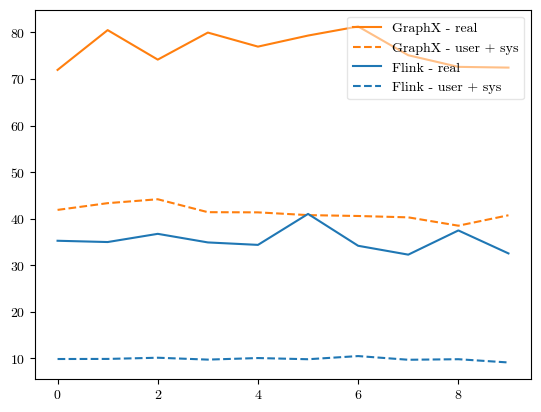

In [94]:
# Read times and seperate them into real, user and sys times in seconds for both GraphX and Flink
real_times = []
user_times = []
sys_times = []

for library in (("graphx", "GraphX", 0, 10), ("flink", "Flink", 10, 20)):
    with open(f"../workspace-{library[0]}/times/shortestPaths.txt") as f:
        for line in f:
            real_match = re.search(r"real\t(\d+)m(\d+.\d+)s", line)
            if real_match:
                real_time = int(real_match.group(1)) * 60 + float(real_match.group(2))
                real_times.append(real_time)
            
            user_match = re.search(r"user\t(\d+)m(\d+.\d+)s", line)
            if user_match:
                user_time = int(user_match.group(1)) * 60 + float(user_match.group(2))
                user_times.append(user_time)

            sys_match = re.search(r"sys\t(\d+)m(\d+.\d+)s", line)
            if sys_match:
                sys_time = int(sys_match.group(1)) * 60 + float(sys_match.group(2))
                sys_times.append(sys_time)

    # Add the user and sys times into one list user_sys_times
    user_sys_times = []
    for i in range(len(user_times)):
        user_sys_times.append(user_times[i] + sys_times[i])

    # Turn the times into floats and round them to 3 decimal places
    real_times = [round(float(i), 3) for i in real_times]
    user_sys_times = [round(float(i), 3) for i in user_sys_times]

    print(f"\n- {library[1]}")
    print("real times:", real_times[library[2]:library[3]])
    print("user + sys times:", user_sys_times[library[2]:library[3]])

print(f"\n- For LaTeX table")
for i in range(10):
    print(f"{real_times[i]} & {user_sys_times[i]} & {real_times[i+10]} & {user_sys_times[i+10]} \\\\")
    print(f"\hline")

avg_real_graphx = sum(real_times[:10]) / len(real_times[:10])
avg_real_flink = sum(real_times[10:]) / len(real_times[10:])
min_real_graphx = min(real_times[:10])
max_real_graphx = max(real_times[:10])
min_real_flink = min(real_times[10:])
max_real_flink = max(real_times[10:])

avg_user_sys_graphx = sum(user_sys_times[:10]) / len(user_sys_times[:10])
avg_user_sys_flink = sum(user_sys_times[10:]) / len(user_sys_times[10:])
min_user_sys_graphx = min(user_sys_times[:10])
max_user_sys_graphx = max(user_sys_times[:10])
min_user_sys_flink = min(user_sys_times[10:])
max_user_sys_flink = max(user_sys_times[10:])

print(f"\nShortest Paths & {avg_real_graphx:.3f} & {avg_real_flink:.3f} \\\\")
print(f"Shortest Paths & {min_real_graphx:.3f} & {min_real_flink:.3f} \\\\")
print(f"Shortest Paths & {max_real_graphx:.3f} & {max_real_flink:.3f} \\\\")

print(f"Shortest Paths & {avg_user_sys_graphx:.3f} & {avg_user_sys_flink:.3f} \\\\")
print(f"Shortest Paths & {min_user_sys_graphx:.3f} & {min_user_sys_flink:.3f} \\\\")
print(f"Shortest Paths & {max_user_sys_graphx:.3f} & {max_user_sys_flink:.3f} \\\\")

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.plot(real_times[:10], label="GraphX - real", color="tab:orange")
plt.plot(user_sys_times[:10], label="GraphX - user + sys", color="tab:orange", linestyle="dashed")
plt.plot(real_times[10:], label="Flink - real", color="tab:blue")
plt.plot(user_sys_times[10:], label="Flink - user + sys", color="tab:blue", linestyle="dashed")
plt.legend(framealpha=0.5)
plt.show()

# Triangle Count


- GraphX
real times: [81.823, 73.826, 68.793, 66.035, 78.578, 71.574, 81.349, 64.337, 62.858, 77.431]
user + sys times: [16.84, 16.552, 17.484, 18.176, 17.544, 18.224, 15.94, 16.676, 17.272, 16.348]

- Flink
real times: [26.697, 24.063, 20.068, 26.462, 24.987, 24.244, 24.387, 24.568, 26.23, 24.685]
user + sys times: [4.652, 4.584, 4.7, 4.684, 5.22, 4.7, 4.512, 4.124, 5.04, 5.128]

- For LaTeX table
81.823 & 16.84 & 26.697 & 4.652 \\
\hline
73.826 & 16.552 & 24.063 & 4.584 \\
\hline
68.793 & 17.484 & 20.068 & 4.7 \\
\hline
66.035 & 18.176 & 26.462 & 4.684 \\
\hline
78.578 & 17.544 & 24.987 & 5.22 \\
\hline
71.574 & 18.224 & 24.244 & 4.7 \\
\hline
81.349 & 15.94 & 24.387 & 4.512 \\
\hline
64.337 & 16.676 & 24.568 & 4.124 \\
\hline
62.858 & 17.272 & 26.23 & 5.04 \\
\hline
77.431 & 16.348 & 24.685 & 5.128 \\
\hline

Triangle Count & 72.660 & 24.639 \\
Triangle Count & 62.858 & 20.068 \\
Triangle Count & 81.823 & 26.697 \\
Triangle Count & 17.106 & 4.734 \\
Triangle Count & 15.940 & 4.124 

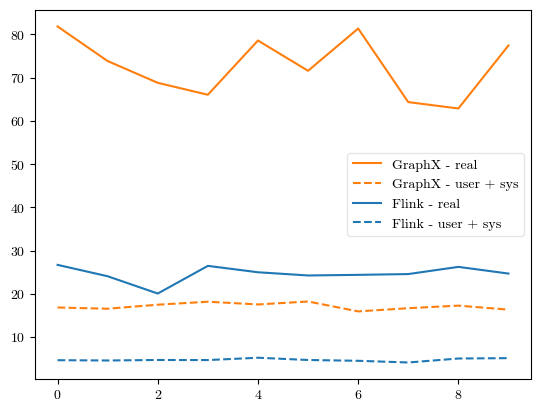

In [95]:
# Read times and seperate them into real, user and sys times in seconds for both GraphX and Flink
real_times = []
user_times = []
sys_times = []

for library in (("graphx", "GraphX", 0, 10), ("flink", "Flink", 10, 20)):
    with open(f"../workspace-{library[0]}/times/triangleCount.txt") as f:
        for line in f:
            real_match = re.search(r"real\t(\d+)m(\d+.\d+)s", line)
            if real_match:
                real_time = int(real_match.group(1)) * 60 + float(real_match.group(2))
                real_times.append(real_time)
            
            user_match = re.search(r"user\t(\d+)m(\d+.\d+)s", line)
            if user_match:
                user_time = int(user_match.group(1)) * 60 + float(user_match.group(2))
                user_times.append(user_time)

            sys_match = re.search(r"sys\t(\d+)m(\d+.\d+)s", line)
            if sys_match:
                sys_time = int(sys_match.group(1)) * 60 + float(sys_match.group(2))
                sys_times.append(sys_time)

    # Add the user and sys times into one list user_sys_times
    user_sys_times = []
    for i in range(len(user_times)):
        user_sys_times.append(user_times[i] + sys_times[i])

    # Turn the times into floats and round them to 3 decimal places
    real_times = [round(float(i), 3) for i in real_times]
    user_sys_times = [round(float(i), 3) for i in user_sys_times]

    print(f"\n- {library[1]}")
    print("real times:", real_times[library[2]:library[3]])
    print("user + sys times:", user_sys_times[library[2]:library[3]])

print(f"\n- For LaTeX table")
for i in range(10):
    print(f"{real_times[i]} & {user_sys_times[i]} & {real_times[i+10]} & {user_sys_times[i+10]} \\\\")
    print(f"\hline")

avg_real_graphx = sum(real_times[:10]) / len(real_times[:10])
avg_real_flink = sum(real_times[10:]) / len(real_times[10:])
min_real_graphx = min(real_times[:10])
max_real_graphx = max(real_times[:10])
min_real_flink = min(real_times[10:])
max_real_flink = max(real_times[10:])

avg_user_sys_graphx = sum(user_sys_times[:10]) / len(user_sys_times[:10])
avg_user_sys_flink = sum(user_sys_times[10:]) / len(user_sys_times[10:])
min_user_sys_graphx = min(user_sys_times[:10])
max_user_sys_graphx = max(user_sys_times[:10])
min_user_sys_flink = min(user_sys_times[10:])
max_user_sys_flink = max(user_sys_times[10:])

print(f"\nTriangle Count & {avg_real_graphx:.3f} & {avg_real_flink:.3f} \\\\")
print(f"Triangle Count & {min_real_graphx:.3f} & {min_real_flink:.3f} \\\\")
print(f"Triangle Count & {max_real_graphx:.3f} & {max_real_flink:.3f} \\\\")

print(f"Triangle Count & {avg_user_sys_graphx:.3f} & {avg_user_sys_flink:.3f} \\\\")
print(f"Triangle Count & {min_user_sys_graphx:.3f} & {min_user_sys_flink:.3f} \\\\")
print(f"Triangle Count & {max_user_sys_graphx:.3f} & {max_user_sys_flink:.3f} \\\\")

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.plot(real_times[:10], label="GraphX - real", color="tab:orange")
plt.plot(user_sys_times[:10], label="GraphX - user + sys", color="tab:orange", linestyle="dashed")
plt.plot(real_times[10:], label="Flink - real", color="tab:blue")
plt.plot(user_sys_times[10:], label="Flink - user + sys", color="tab:blue", linestyle="dashed")
plt.legend(framealpha=0.5)
plt.show()

# Weakly Connected Components


- GraphX
real times: [49.91, 50.478, 49.497, 50.586, 49.006, 51.315, 49.99, 50.528, 48.773, 48.523]
user + sys times: [32.908, 30.388, 32.744, 33.272, 30.004, 31.816, 31.544, 31.604, 31.076, 30.164]

- Flink
real times: [51.647, 48.523, 55.681, 48.943, 46.504, 50.002, 52.112, 53.084, 53.219, 62.942]
user + sys times: [8.36, 8.612, 8.468, 8.984, 8.744, 8.448, 6.34, 8.928, 6.544, 6.376]

- For LaTeX table
49.91 & 32.908 & 51.647 & 8.36 \\
\hline
50.478 & 30.388 & 48.523 & 8.612 \\
\hline
49.497 & 32.744 & 55.681 & 8.468 \\
\hline
50.586 & 33.272 & 48.943 & 8.984 \\
\hline
49.006 & 30.004 & 46.504 & 8.744 \\
\hline
51.315 & 31.816 & 50.002 & 8.448 \\
\hline
49.99 & 31.544 & 52.112 & 6.34 \\
\hline
50.528 & 31.604 & 53.084 & 8.928 \\
\hline
48.773 & 31.076 & 53.219 & 6.544 \\
\hline
48.523 & 30.164 & 62.942 & 6.376 \\
\hline

Weakly Connected Components & 49.861 & 52.266 \\
Weakly Connected Components & 48.523 & 46.504 \\
Weakly Connected Components & 51.315 & 62.942 \\
Weakly Connected C

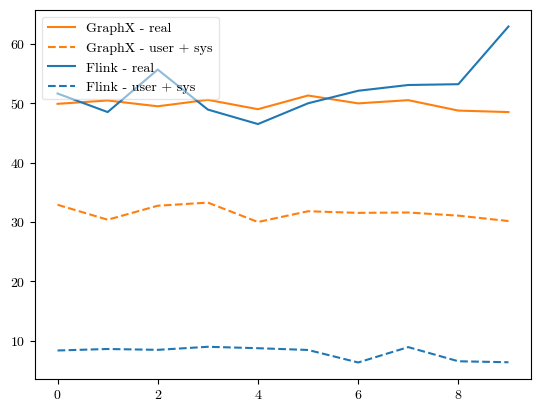

In [96]:
# Read times and seperate them into real, user and sys times in seconds for both GraphX and Flink
real_times = []
user_times = []
sys_times = []

for library in (("graphx", "GraphX", 0, 10), ("flink", "Flink", 10, 20)):
    with open(f"../workspace-{library[0]}/times/weaklyConnectedComponents.txt") as f:
        for line in f:
            real_match = re.search(r"real\t(\d+)m(\d+.\d+)s", line)
            if real_match:
                real_time = int(real_match.group(1)) * 60 + float(real_match.group(2))
                real_times.append(real_time)
            
            user_match = re.search(r"user\t(\d+)m(\d+.\d+)s", line)
            if user_match:
                user_time = int(user_match.group(1)) * 60 + float(user_match.group(2))
                user_times.append(user_time)

            sys_match = re.search(r"sys\t(\d+)m(\d+.\d+)s", line)
            if sys_match:
                sys_time = int(sys_match.group(1)) * 60 + float(sys_match.group(2))
                sys_times.append(sys_time)

    # Add the user and sys times into one list user_sys_times
    user_sys_times = []
    for i in range(len(user_times)):
        user_sys_times.append(user_times[i] + sys_times[i])

    # Turn the times into floats and round them to 3 decimal places
    real_times = [round(float(i), 3) for i in real_times]
    user_sys_times = [round(float(i), 3) for i in user_sys_times]

    print(f"\n- {library[1]}")
    print("real times:", real_times[library[2]:library[3]])
    print("user + sys times:", user_sys_times[library[2]:library[3]])

print(f"\n- For LaTeX table")
for i in range(10):
    print(f"{real_times[i]} & {user_sys_times[i]} & {real_times[i+10]} & {user_sys_times[i+10]} \\\\")
    print(f"\hline")

avg_real_graphx = sum(real_times[:10]) / len(real_times[:10])
avg_real_flink = sum(real_times[10:]) / len(real_times[10:])
min_real_graphx = min(real_times[:10])
max_real_graphx = max(real_times[:10])
min_real_flink = min(real_times[10:])
max_real_flink = max(real_times[10:])

avg_user_sys_graphx = sum(user_sys_times[:10]) / len(user_sys_times[:10])
avg_user_sys_flink = sum(user_sys_times[10:]) / len(user_sys_times[10:])
min_user_sys_graphx = min(user_sys_times[:10])
max_user_sys_graphx = max(user_sys_times[:10])
min_user_sys_flink = min(user_sys_times[10:])
max_user_sys_flink = max(user_sys_times[10:])

print(f"\nWeakly Connected Components & {avg_real_graphx:.3f} & {avg_real_flink:.3f} \\\\")
print(f"Weakly Connected Components & {min_real_graphx:.3f} & {min_real_flink:.3f} \\\\")
print(f"Weakly Connected Components & {max_real_graphx:.3f} & {max_real_flink:.3f} \\\\")

print(f"Weakly Connected Components & {avg_user_sys_graphx:.3f} & {avg_user_sys_flink:.3f} \\\\")
print(f"Weakly Connected Components & {min_user_sys_graphx:.3f} & {min_user_sys_flink:.3f} \\\\")
print(f"Weakly Connected Components & {max_user_sys_graphx:.3f} & {max_user_sys_flink:.3f} \\\\")

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.plot(real_times[:10], label="GraphX - real", color="tab:orange")
plt.plot(user_sys_times[:10], label="GraphX - user + sys", color="tab:orange", linestyle="dashed")
plt.plot(real_times[10:], label="Flink - real", color="tab:blue")
plt.plot(user_sys_times[10:], label="Flink - user + sys", color="tab:blue", linestyle="dashed")
plt.legend(framealpha=0.5)
plt.show()